In [2]:
# Importing Required Packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import random
import names
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv(r"C:\Users\dukef\OneDrive\Documents\Teaching\Intellipaat\Python\9.Supervised Learning\diabetes.csv")
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# Splitting X and Y Variables
x = df.drop(columns = 'Outcome')
y = df['Outcome']

In [5]:
x.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [6]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

In [8]:
df.shape

(768, 9)

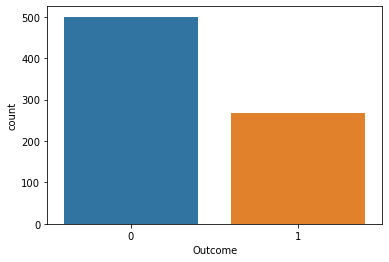

In [9]:
# Imbalanced Class
sns.countplot(x = 'Outcome', data = df);

In [10]:
# Splitting the data set into Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [15]:
model = LogisticRegression(max_iter = 1000).fit(x_train, y_train)

In [16]:
y_hat = model.predict(x_test)

In [19]:
# Comparing Actual and Predicted Data
comp = pd.DataFrame({"Actual Class" : y_test, "Predicted Class": y_hat})
comp.head(15)

,Actual Class,Predicted Class
368,0,0
252,0,0
646,1,0
35,0,0
704,0,0
162,0,0
260,0,1
212,0,1
505,0,0
243,1,0


In [18]:
comp.shape

(154, 2)

# Quantifying Errors using Confusion Matrix

In [20]:
print(confusion_matrix(y_test, y_hat))

[[87 12]
 [27 28]]


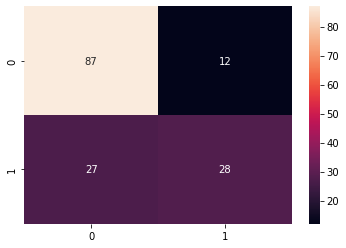

In [28]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot = True);

In [21]:
print("Incorrect Predictions: ", 39)

Incorrect Predictions:  39


In [26]:
# Accuracy
print("Accuracy", round((154 - 39) / 154, 2)*100)

Accuracy 75.0


In [32]:
# Classification Error Metrics
print('Error Metrics\n\n', classification_report(y_test, y_hat))

Error Metrics

               precision    recall  f1-score   support

           0       0.76      0.88      0.82        99
           1       0.70      0.51      0.59        55

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



# ROC Curve

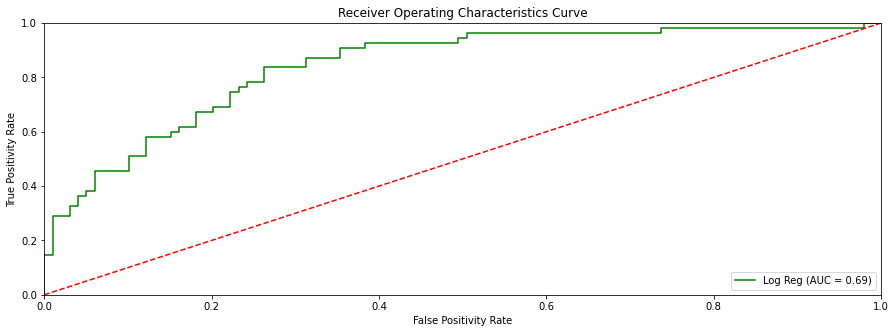

In [41]:
logit_auc_score = roc_auc_score(y_test, y_hat) # Generating AUC Score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1]) # Generating TPR, FPR and Thresholds Score
plt.figure(figsize = (15, 5))
plt.title("Receiver Operating Characteristics Curve")
plt.plot(fpr, tpr, 'g', label = "Log Reg (AUC = %0.2f)" % logit_auc_score) # Plotting ROC curve with AUC score
plt.plot([0, 1], [0, 1],  'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.legend(loc = "lower right");